# Breast Cancer Prediction

In [39]:
# Lets import allthe necessary libraries
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns

In [40]:
# Let's read the data.csv file using pandas
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Here, in the column "diagnosis", M refers to 'Maglinant', otherwise 'benign'.

Feature scaling is a method used to normalize the range of independent variables or features of data. 

In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [42]:
# We can clearly see that the final column has NaN values; So, lets remove that column as it has no use for us
df = df.drop(['Unnamed: 32','id'],axis = 1)
# Alternative way: df = df.dropna(axis=1) 
# Here, "Unnamed: 32" is the final column, and axis = 1 refers to the first column.
# axis{0 or ‘index’, 1 or ‘columns’}, default 0; Whether to drop labels from the index (0 or ‘index’) or --
# --columns (1 or ‘columns’).

In [43]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [44]:
# In the above dataframe, only column diagnosis is categorical. Lets assign the categorical column to binary values 0 or 1 
df['diagnosis'].replace(to_replace = dict(M=1,B=0),inplace=True)
'''
Alternative vway: 
Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)'''

'\nAlternative vway: \nEncoding categorical data values\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder_Y = LabelEncoder()\nY = labelencoder_Y.fit_transform(Y)'

In [45]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
# Lets check the value count of the benign vs malignant cases
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [47]:
l1 =list(df.diagnosis.value_counts())

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

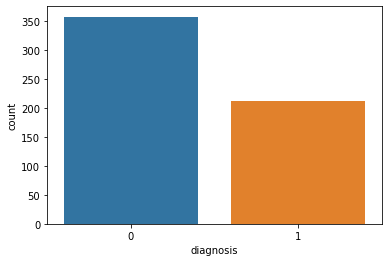

In [48]:
sns.countplot(x=df.diagnosis)

In [49]:
print('Proportion of 0 and 1: '+str((round(l1[0]/l1[1],2)))+':1')

Proportion of 0 and 1: 1.68:1


In [50]:
# Now, lets create our feature matrix, and response vectors X and y
columns = list(df.columns)
columns.remove('diagnosis')
X = df[columns]
y = df.diagnosis

In [51]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [52]:
y.head(2)

0    1
1    1
Name: diagnosis, dtype: int64

In [53]:
# Lets split the dataset into Training and Testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

Here, in X, we can clearly see that there are so many properties like radius,perimeter, concavity etc

These features are highly varying when compared to each other with respect to their magnitude, range, units etc
So, we will try to bring all features to same level of magnitudes by trasforming the data to fit within specific scale, like 0-100, or 0-1 respectively

This can be achieved by Scaling, for which we will use StandardScaler method from sklearn library


In [54]:
# Lets import our feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# I will use the following supervised learning algorithm:
    -  Logistic Regression


In [55]:
# Using logistic regression algorithm to the training set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# Lets make predictions and measure accuracy for this model
y_pred = log_reg.predict(X_test)

# Measuring accuracy using accuracy_score() function
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9649122807017544


However, To check the accuracy properly, we need to import confusion_matrix method of metrics class. The confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [56]:
# Importing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[139,   6],
       [  2,  81]], dtype=int64)

In [58]:
# save confusion matrix and slice into 4 pieces 
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In the confusion matrix above, It is presented as: [[TN,FP],[FN,TP]], where:

        TN = True Positive
        FP = False Positive
        FN = False Negative
        TP = True Positive

In [59]:
# Here, using the confusion matrix, accuracy can be measured as ((FP+FN)/ (TP+TN+FP+FN))
print("The overall accuracy is: ", (TP+TN)/ float(TP+TN+FP+FN))

The overall accuracy is:  0.9649122807017544


In [62]:
# Lets make a prediction
log_reg.predict([X_test[5]])

# This returns 0, which means non-cancer

array([0], dtype=int64)

In [65]:
# Lets make another prediction
log_reg.predict([X_test[0]])

# This returns 0, which means breast cancer

array([1], dtype=int64)

# Done by Sujan Neupane -- Thank you

# Useful sites for this project
https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3

https://medium.com/swlh/breast-cancer-detection-using-logistic-regression-7bef0110aff5

https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d